# PathLoss model

https://en.wikipedia.org/wiki/Path_loss

- The power conversion of $\mathrm{dBm}$ to $\mathrm{mW}$ is given by the formula:

$$
P_{(\mathrm{mW})}=1 \mathrm{~mW} \cdot 10^{\left(P_{(\mathrm{dBm})} / 10\right)}
$$

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix


In [123]:
# location of transmitter and receiver
tx_xyz = [0, 0, 10]
rx_xyz = [1, 1, 0]

In [124]:
# calculate distance between transmitter and receiver
d = distance_matrix([tx_xyz], [rx_xyz])
d # [meter]

array([[10.09950494]])

#### free space pathloss

In [125]:
tx_power = 40  # transmit power [dBm]
f = 1e9  # frequency 1GH [Hz]
c = 299792458  # speed of light [m/s]

# calculate pathloss function
pl = 20*np.log10((4*np.pi*d*f)/c) # pathloss  [dB]
pl

array([[52.53378494]])

#### receive power

In [126]:
# calculate receive power
rx_power = tx_power - pl
rx_power

array([[-12.53378494]])

In [127]:
# convert receive power to milliWatts
rx_power = 1*10**(rx_power/10) # transmit power [mW]
rx_power

array([[0.05579837]])

#### plot pathloss model

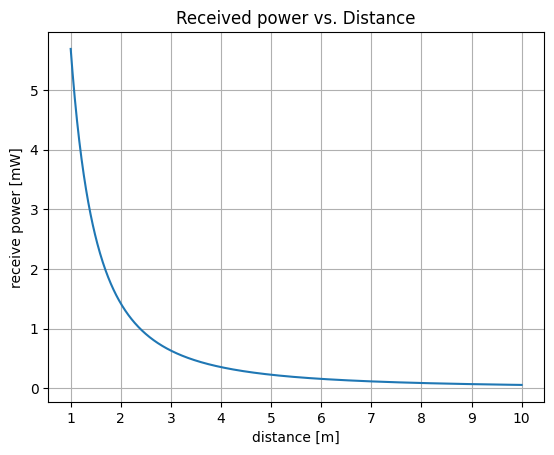

In [128]:
d = np.linspace(1, 10, 1000)

rx_power = 1*10**((tx_power - (20*np.log10((4*np.pi*d*f)/c)))/10)

plt.plot(d, rx_power)
plt.xlabel("distance [m]")
plt.ylabel("receive power [mW]")
plt.title("Received power vs. Distance")
plt.xticks(np.linspace(1, 10, 10))
plt.grid()
plt.show()